# Alpha-Excel 시연

In [1]:
import pandas as pd
import numpy as np

from alpha_excel import AlphaExcel, Field
from alpha_excel.ops.timeseries import *
from alpha_excel.ops.group import *
from alpha_excel.portfolio import *

from alpha_database import DataSource

## 시작하기

In [2]:
# DataSource 인스턴스 생성
ds = DataSource()

# AlphaExcel 인스턴스 생성
ae = AlphaExcel(
    data_source=ds,
    start_date="2020-01-01",
    end_date="2024-12-31",
)

In [3]:
ae.universe.head()

symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200,A950210,A950220
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
2020-01-03,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
2020-01-06,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
2020-01-07,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
2020-01-08,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False


In [4]:
ae.universe.shape

(1231, 2816)

## 데이터 불러오기

In [5]:
returns = Field("returns") # 수익률
returns

Field(name='returns', data_type=None)

In [6]:
industry_group = Field("fnguide_industry_group") # 에프앤가이드 산업분류
industry_group

Field(name='fnguide_industry_group', data_type=None)

데이터를 불러오려면 Expression을 Evaluate 해야 함.

In [7]:
returns_df = ae.evaluate(returns)
returns_df.head()

symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200,A950210,A950220
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.010830,NaN,0.010707,0.032328,-0.039216,0.004478,-0.003448,-0.021130,-0.016129,0.000000,...,-0.009756,0.029512,0.011312,0.0,0.038417,0.040625,NaN,NaN,NaN,NaN
2020-01-03,-0.004762,NaN,-0.010593,0.001044,0.000000,-0.008915,-0.012111,-0.004328,-0.029508,0.007576,...,-0.017734,0.004410,0.050336,0.0,-0.001121,0.048048,NaN,NaN,NaN,NaN
2020-01-06,-0.021531,NaN,-0.021413,-0.005214,-0.029155,-0.037481,0.003503,-0.017360,-0.006757,0.015038,...,-0.022066,-0.025796,0.001065,0.0,-0.040404,-0.028653,NaN,NaN,NaN,NaN
2020-01-07,-0.002445,NaN,-0.029384,0.002096,-0.015015,0.010903,-0.006981,0.017666,0.000000,0.000000,...,0.025641,0.002254,0.006383,0.0,-0.007018,0.002950,NaN,NaN,NaN,NaN
2020-01-08,-0.028186,NaN,-0.015137,-0.030335,-0.015244,-0.049307,-0.026362,-0.019533,-0.023810,-0.003704,...,-0.027000,-0.057336,-0.020085,0.0,-0.048292,-0.029412,NaN,NaN,NaN,NaN


In [8]:
industry_group_df = ae.evaluate(industry_group)
industry_group_df.iloc[18:21] # 산업 분류는 월말에만 데이터가 존재하지만, 불러올 때 자동으로 ffill 처리됨. 

symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200,A950210,A950220
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,제약 및 바이오,NaN,자동차 및 부품,내구 소비재 및 의류,보험,소재,음식료 및 담배,제약 및 바이오,운송,음식료 및 담배,...,소프트웨어,의료장비 및 서비스,생활용품,유통,유통,소프트웨어,NaN,NaN,NaN,NaN
2020-01-31,제약 및 바이오,NaN,자동차 및 부품,내구 소비재 및 의류,보험,소재,음식료 및 담배,제약 및 바이오,운송,음식료 및 담배,...,소프트웨어,의료장비 및 서비스,생활용품,유통,유통,소프트웨어,NaN,NaN,NaN,NaN
2020-02-03,제약 및 바이오,NaN,자동차 및 부품,내구 소비재 및 의류,보험,소재,음식료 및 담배,제약 및 바이오,운송,음식료 및 담배,...,소프트웨어,의료장비 및 서비스,생활용품,유통,유통,소프트웨어,NaN,NaN,NaN,NaN


## 연산자 사용하기

In [13]:
expr = GroupNeutralize(
    TsMean(
        Field('returns') * -1, 
        window=5
        ), 
        group_by='fnguide_industry_group'
    )
expr

GroupNeutralize(child=TsMean(child=Multiply(left=Field(name='returns', data_type=None), right=Constant(value=-1)), window=5), group_by='fnguide_industry_group')

In [14]:
scaler = DollarNeutralScaler() # Long Short의 합은 0, 절대값 합은 1이 되도록 스케일링

In [15]:
result = ae.evaluate(expr, scaler=scaler)
result.head()

symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200,A950210,A950220
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.001195,NaN,0.006725,-0.011011,0.010927,0.005031,0.008708,0.014568,0.022885,-0.002859,...,0.018032,-0.011822,-0.023195,0.003026,-0.015622,-0.040050,NaN,NaN,NaN,NaN
2020-01-06,-0.003871,NaN,0.007237,-0.011852,0.011163,0.009973,-0.002330,0.005247,0.010474,-0.013887,...,0.014521,-0.006122,-0.023840,-0.005521,-0.004485,-0.022005,NaN,NaN,NaN,NaN
2020-01-07,0.000092,NaN,0.012825,-0.006061,0.011786,0.005938,0.001747,0.001903,0.008787,-0.008665,...,0.008826,-0.003810,-0.011239,-0.002010,0.000522,-0.012896,NaN,NaN,NaN,NaN
2020-01-08,-0.003432,NaN,0.006377,-0.006008,0.007306,0.007259,-0.000565,-0.003714,0.004435,-0.013427,...,0.005526,0.000168,-0.012268,-0.007081,0.004603,-0.011369,NaN,NaN,NaN,NaN


## 성과 추적하기

In [17]:
step0 = ae.get_cumulative_pnl(0) # 'returns' 자체를 시그널로 사용했을 때의 수익률
step1 = ae.get_cumulative_pnl(1) # -1 곱했을 때의 수익률
step2 = ae.get_cumulative_pnl(2) # TsMean 씌웠을 때의 수익률
step3 = ae.get_cumulative_pnl(3) # GroupNeutralize 씌웠을 때의 수익률

<Axes: xlabel='date'>

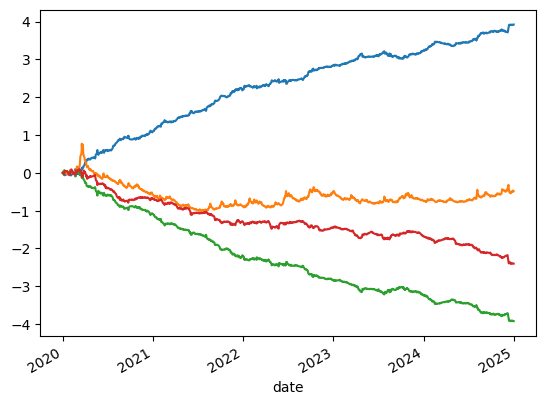

In [21]:
step0.plot()
step1.plot()
step2.plot()
step3.plot()
